# Input 4 Feature attribution

How to determine the importance of features? This is known as feature attribution. This notebook shows how to get feature scores in KANs.

In [1]:
from kan import *
from sympy import *

# let's construct a dataset
f = lambda x: x[:,0]**2 + 0.3*x[:,1] + 0.1*x[:,2]**3 + 0.0*x[:,3]
dataset = create_dataset(f, n_var=4)

input_vars = [r'$x_'+str(i)+'$' for i in range(4)]

model = KAN(width=[4,5,1])
model.fit(dataset, steps=40, lamb=0.001);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.98e-03 | test_loss: 3.06e-03 | reg: 1.94e+00 | : 100%|█| 40/40 [00:17<00:00,  2.30it

saving model version 0.1


get feature score

In [2]:
model.feature_score

tensor([0.8882, 0.5098, 0.1094, 0.0009])

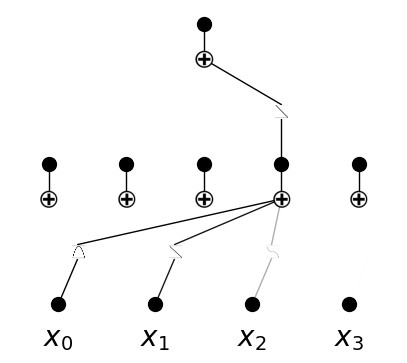

In [4]:
model.plot(in_vars=input_vars)

prune inputs

keep: [True, True, True, False]
saving model version 0.2


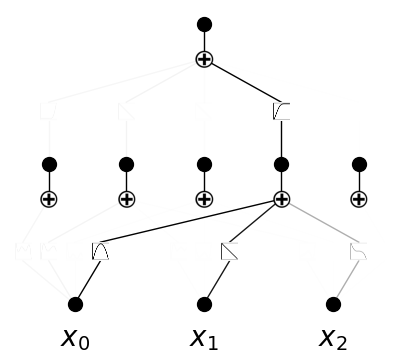

In [5]:
model = model.prune_input()
model.plot(in_vars=input_vars)

Let's consider a high-dimensional case. In the case of many inputs but only few are important, the users may want to prune input otherwise too many inputs make interpretable hard.

In [5]:
from kan import *

# let's construct a dataset
n_var = 100

def f(x):
    y = 0
    for i in range(n_var):
        # exponential decay
        y += x[:,[i]]**2*0.5**i
    return y
        
dataset = create_dataset(f, n_var=n_var)

input_vars = [r'$x_'+str(i)+'$' for i in range(n_var)]

model = KAN(width=[n_var,10,10,1])
model.fit(dataset, steps=50, lamb=0.001);

train loss: 9.93e-03 | test loss: 1.37e-02 | reg: 5.89e+00 : 100%|██| 50/50 [08:03<00:00,  9.66s/it]


Since there are 100D inputs, it's very time consuming to plot the whole diagram and hard to read anything meaningful out of the diagram. So we want to prune the network first (including pruning hidden nodes and pruning inputs) and then plot it.

keep: [True, True, True, True, True, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


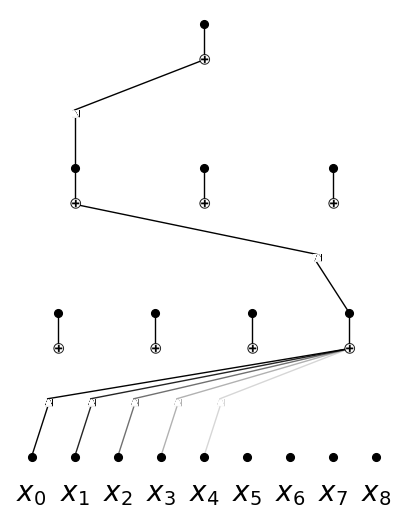

In [6]:
model = model.prune()
model = model.prune_input()
model.plot(in_vars=input_vars)

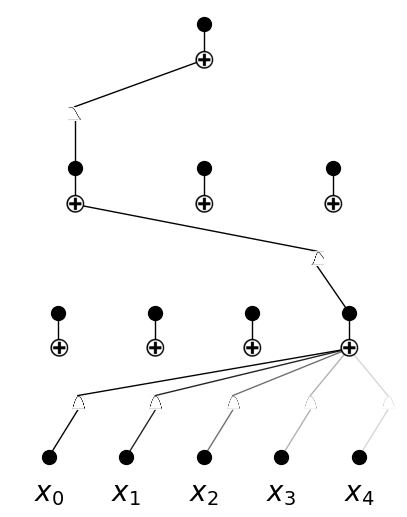

In [7]:
# manual prune inputs
model = model.prune_input(active_inputs=[0,1,2,3,4])
model.plot(in_vars=input_vars)

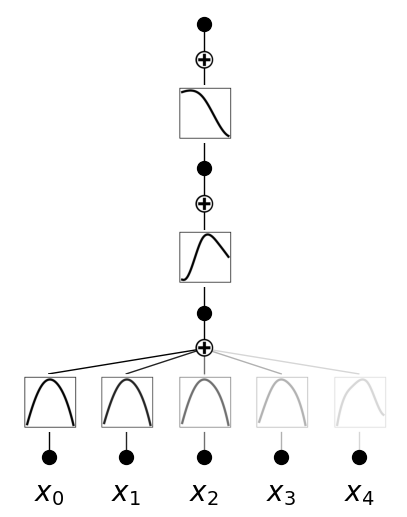

In [8]:
# prune nodes
model = model.prune_node()
model.plot(in_vars=input_vars)